In [1]:
from matplotlib import pyplot as plt
import argparse
import cv2
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

from modules.take_roi import take_roi
from modules.tracker import tracker

In [2]:
path = 'C:/Users/ABC/Desktop/object_tracking/sample_images/0000001.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (256, 256))
normalized = cv2.normalize(img, None, 100, 255, cv2.NORM_MINMAX)
_, threshold = cv2.threshold(normalized, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _, threshold = cv2.threshold(normalized, 125, 255, cv2.THRESH_BINARY)

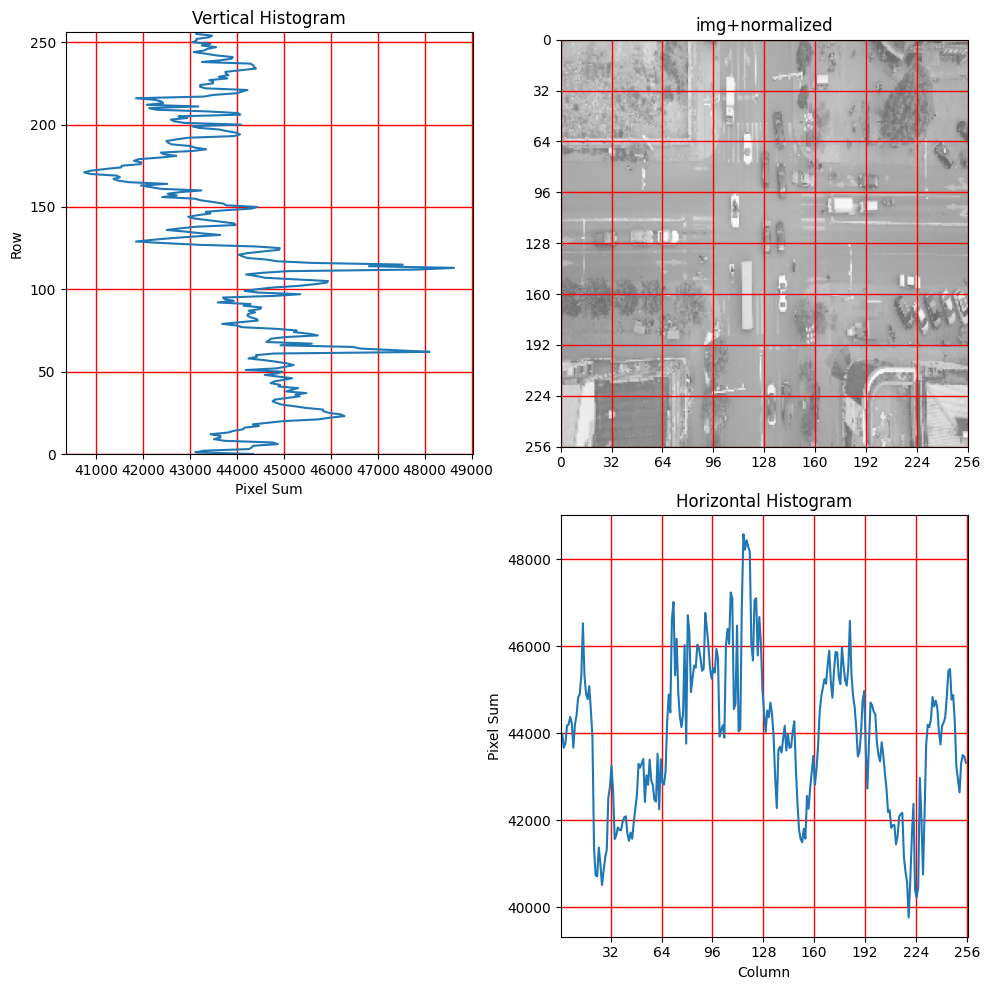

In [53]:
vertical_histogram = np.sum(normalized, axis=1)

# Tính histogram theo chiều ngang
horizontal_histogram = np.sum(normalized, axis=0)

# Hiển thị histogram
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(221)
plt.plot(vertical_histogram, range(len(vertical_histogram)))
plt.title('Vertical Histogram')
plt.xlabel('Pixel Sum')
plt.grid(color='red', linestyle='-', linewidth=1)
plt.ylabel('Row')
ax1.set_ylim([0, 256])
plt.subplot(2, 2, 2)
plt.xticks(np.arange(-0.5, normalized.shape[1], 32), [0, 32, 64, 96, 128, 160,192, 224, 256])
plt.yticks(np.arange(-0.5, normalized.shape[0], 32), [0, 32, 64, 96, 128, 160,192, 224, 256])
plt.grid(color='red', linestyle='-', linewidth=1)
plt.imshow(cv2.cvtColor(normalized , cv2.COLOR_GRAY2BGR))  
plt.title('img+normalized')
ax4 = plt.subplot(2, 2, 4)
plt.plot(horizontal_histogram)
plt.xticks(np.arange(-0.5, normalized.shape[1], 32), [0, 32, 64, 96, 128, 160,192, 224, 256])
plt.title('Horizontal Histogram')
plt.grid(color='red', linestyle='-', linewidth=1)
plt.xlabel('Column')
plt.ylabel('Pixel Sum')
ax4.set_xlim([0,256])

plt.tight_layout()
plt.show()

In [54]:
def interest_region(histogram):
    # Giới hạn gồm 8 cửa sổ 32 pixel (256 = 8 x 32)
    interest_blocks = []
    list = []
    for _ in range(5):
        
        first_criteria = 0
        for i in range(8):
            if i not in list:
                max = np.max(histogram[32*i : 32*(i+1) - 1])
                min = np.min(histogram[32*i : 32*(i+1) - 1])
                
                if max - min > first_criteria:
                    choosen_block = {'id': i, 'max':max, 'min':min}
                    first_criteria = max - min
        interest_blocks.append(choosen_block)
        
        list.append(choosen_block['id'])
    return interest_blocks, list   

In [55]:
_ ,ls1 = interest_region(vertical_histogram)
_, ls2 = interest_region(horizontal_histogram)
ls1, ls2

([3, 1, 0, 2, 5], [0, 7, 6, 3, 2])

Text(0.5, 1.0, 'img+normalized')

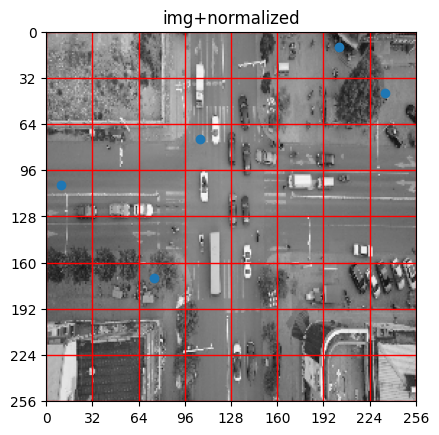

In [57]:
plt.xticks(np.arange(-0.5, normalized.shape[1], 32), [0, 32, 64, 96, 128, 160,192, 224, 256])
plt.yticks(np.arange(-0.5, normalized.shape[0], 32), [0, 32, 64, 96, 128, 160,192, 224, 256])
plt.grid(color='red', linestyle='-', linewidth=1)
y = [(i * 32 + 10) for i in ls1]
x = [(i * 32 + 10) for i in ls2]
plt.plot(x,y,marker='o',label='Scatter Plot',linestyle='')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_GRAY2BGR))  
plt.title('img+normalized')